<a href="https://colab.research.google.com/github/ianlap/PH591/blob/main/plot_adevs_w_errorbars__drift_removed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

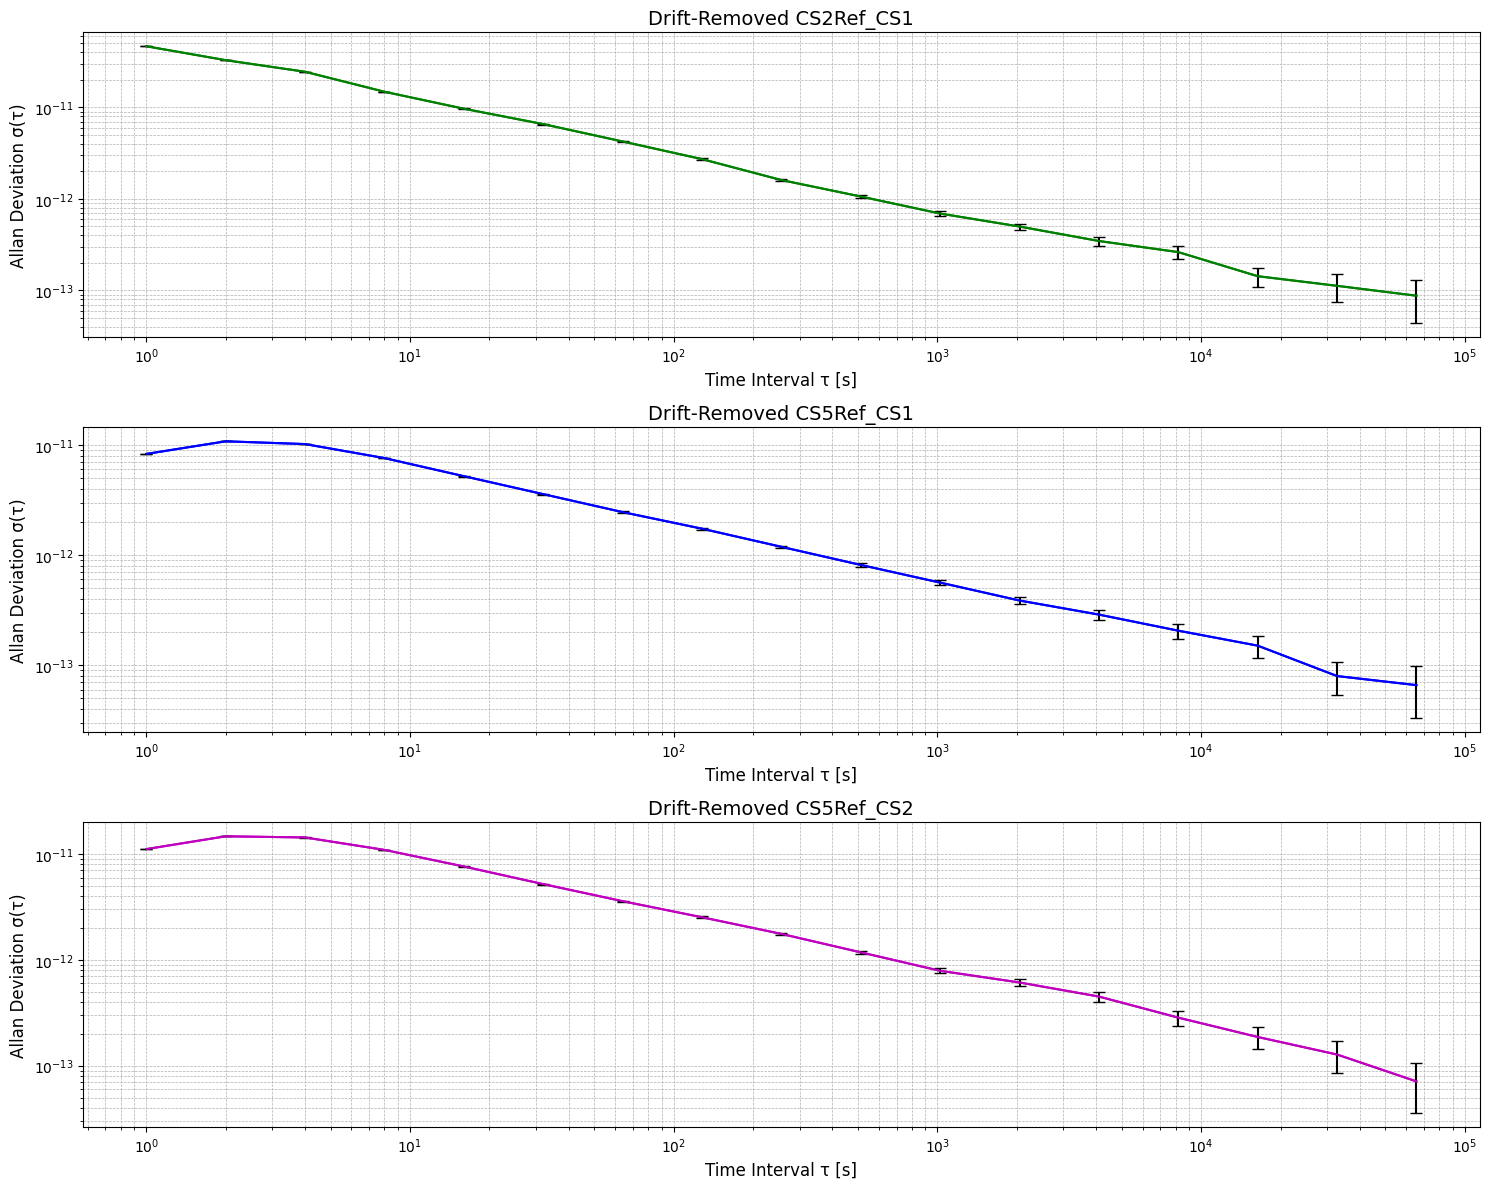

In [1]:
import allantools as at
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress

def find_linear_residuals(t, phase):
    slope, intercept, _, _, _ = linregress(t, phase)
    predicted = slope * t + intercept
    residuals = phase - predicted
    return t, residuals

def plotallan_phase(ax, taus, adev, aderror, color, title):
    ax.loglog(taus, adev, linestyle='-', color=color)
    ax.errorbar(taus, adev, yerr=aderror, capsize=4, ecolor='black', color=color)
    ax.set_title(title, fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlabel('Time Interval \u03C4 [s]', fontsize=12)
    ax.set_ylabel('Allan Deviation \u03C3(\u03C4)', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

# Load data
data12 = np.genfromtxt('CS2_REF_CS1_In_phase.csv', delimiter=',')
data15 = np.genfromtxt('CS5Ref_CS1in_phase.csv', delimiter=',')
data25 = np.genfromtxt('CS5Ref_CS2in_phase.csv', delimiter=',')

# Ensure all phase data lengths match the shortest dataset
N = len(data25)
t12, phase12 = data12[:N, 0], data12[:N, 1]
t15, phase15 = data15[:N, 0], data15[:N, 1]
t25, phase25 = data25[:, 0], data25[:, 1]

# Compute drift-removed phase data
t12_res, phase12_res = find_linear_residuals(t12, phase12)
t15_res, phase15_res = find_linear_residuals(t15, phase15)
t25_res, phase25_res = find_linear_residuals(t25, phase25)

# Compute Allan deviations before plotting: Drift removed
(taus, adev_AB, aderror_AB, _) = at.adev(phase12_res, rate=1, data_type='phase', taus='octave')
(_, adev_AC, aderror_AC, _) = at.adev(phase15_res, rate=1, data_type='phase', taus='octave')
(_, adev_BC, aderror_BC, _) = at.adev(phase25_res, rate=1, data_type='phase', taus='octave')


def showplot():
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))

    plotallan_phase(axes[0], taus, adev_AB, aderror_AB, 'g', 'Drift-Removed CS2Ref_CS1')  # Green
    plotallan_phase(axes[1], taus, adev_AC, aderror_AC, 'b', 'Drift-Removed CS5Ref_CS1')  # Blue
    plotallan_phase(axes[2], taus, adev_BC, aderror_BC, 'm', 'Drift-Removed CS5Ref_CS2')  # Magenta

    plt.tight_layout()
    plt.savefig("adevErrorBars.png")
    plt.savefig("adevErrorBars.pdf")
    plt.savefig("adevErrorBars.svg")
    plt.show()

showplot()
